In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

In [2]:
def NOT(inp):
    """An NOT gate.
    
    Parameters:
        inp (str): Input, encoded in qubit 0.
        
    Returns:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0)
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if inp=='1':
        qc.x(0)
        
    # barrier between input state and gate operation 
    qc.barrier()
    
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x(0)
    
    #barrier between gate operation and measurement
    qc.barrier()
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure(0,0)
    qc.draw('mpl')
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output

NOT with input 0 gives output 1


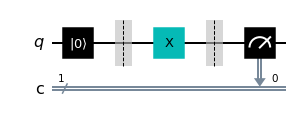



NOT with input 1 gives output 0


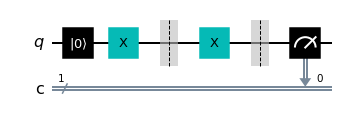

In [3]:
## Test the function
for inp in ['0', '1']:
    qc, out = NOT(inp)
    print('NOT with input',inp,'gives output',out)
    display(qc.draw(output = 'mpl'))
    print('\n')

In [4]:
def XOR(inp1,inp2):
    """An XOR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
    """
  
    qc = QuantumCircuit(2, 1) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # this is where your program for quantum XOR gate goes
    
    if inp1 != inp2 and inp2=='0':
        qc.x(1)
    if inp1 == inp2 and inp2=='1':
        qc.x(1)
            
    # barrier between input state and gate operation 
    qc.barrier()
    
    qc.measure(1,0) # output from qubit 1 is measured
  
    #We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

XOR with inputs 0 0 gives output 0


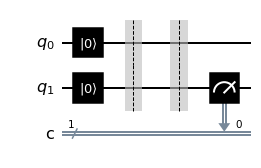



XOR with inputs 0 1 gives output 1


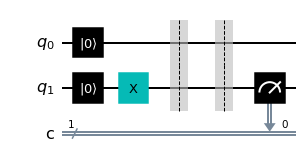



XOR with inputs 1 0 gives output 1


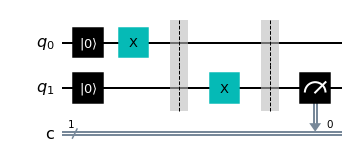



XOR with inputs 1 1 gives output 0


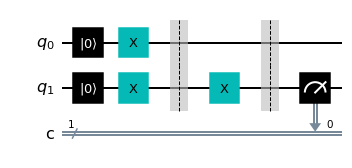

In [5]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = XOR(inp1, inp2)
        print('XOR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw(output = 'mpl'))
        print('\n')

In [6]:
def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # this is where your program for quantum AND gate goes
    if inp1 == inp2 and inp1 == '1':
        qc.x(2)
        

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

AND with inputs 0 0 gives output 0


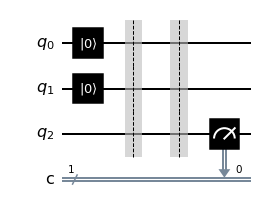



AND with inputs 0 1 gives output 0


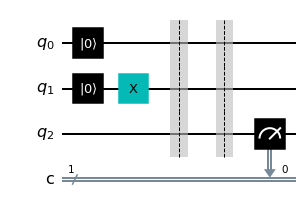



AND with inputs 1 0 gives output 0


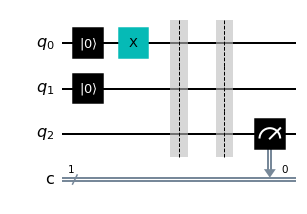



AND with inputs 1 1 gives output 1


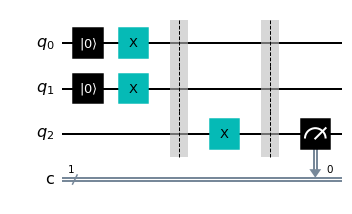

In [7]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw(output = 'mpl'))
        print('\n')

In [8]:
def NAND(inp1,inp2):
    """An NAND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
    
    # this is where your program for quantum NAND gate goes
    if inp1 != inp2:
        qc.x(2)
    if inp1 == inp2 and inp1 == '0':
        qc.x(2)

    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

NAND with inputs 0 0 gives output 1


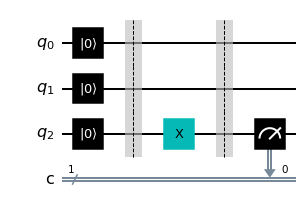



NAND with inputs 0 1 gives output 1


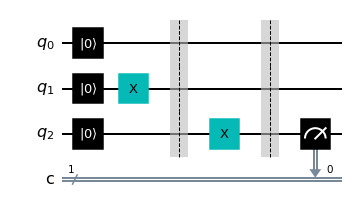



NAND with inputs 1 0 gives output 1


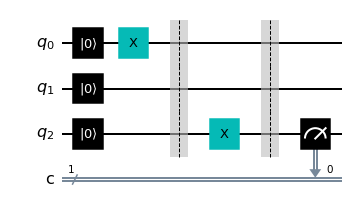



NAND with inputs 1 1 gives output 0


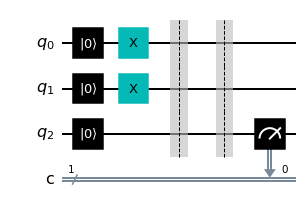

In [9]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = NAND(inp1, inp2)
        print('NAND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw(output = 'mpl'))
        print('\n')

In [10]:
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    # this is where your program for quantum OR gate goes
    
    if inp1 != inp2:
        qc.x(2)

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

OR with inputs 0 0 gives output 0


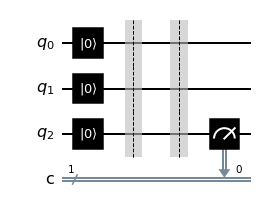



OR with inputs 0 1 gives output 1


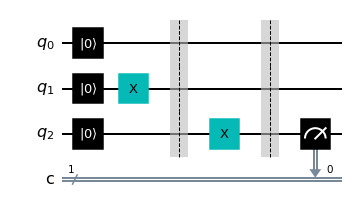



OR with inputs 1 0 gives output 1


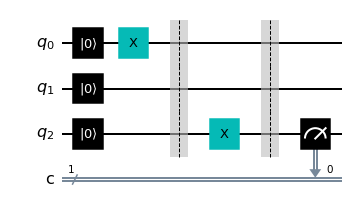



OR with inputs 1 1 gives output 0


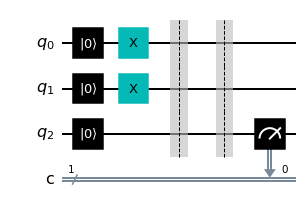

In [11]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('OR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw(output = 'mpl'))
        print('\n')

In [12]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [13]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [14]:
provider = IBMQ.get_provider('ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [15]:
import qiskit.tools.jupyter

backend_ex = provider.get_backend('ibmq_manila')
backend_ex

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
backends = provider.backends(filters = lambda x:x.configuration().n_qubits >= 2 and not x.configuration().simulator
                             and x.status().operational==True)
backends

[<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [17]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
# run this cell
backend1 = provider.get_backend('ibmq_bogota')
backend2 = provider.get_backend('ibmq_lima')

AND gate


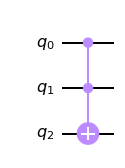



Transpiled AND gate with all the reqiured connectiviy


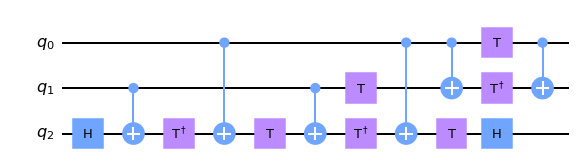

In [19]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw(output = 'mpl'))
print('\n\nTranspiled AND gate with all the reqiured connectiviy')
qc_and.decompose().draw(output = 'mpl')

In [20]:
from qiskit.tools.monitor import job_monitor

In [21]:
# run the cell to define AND gate for real quantum system

def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    job = execute(qc_trans, backend, shots=8192)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output

In [22]:
# run this cell for the widget
backend1

<IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>

In [23]:
# Assign your choice of the initial_layout to the variable layout1 as a list 
# ex) layout1 = [0,2,4]
layout1 = [0,2,4]

# Qubits 0,2,4 have the lowest average readout error therefore they are the most accurate to select 

In [24]:
output1_all = []
qc_trans1_all = []
prob1_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans1, output1 = AND(input1, input2, backend1, layout1)
        
        output1_all.append(output1)
        qc_trans1_all.append(qc_trans1)
        
        prob = output1[str(int( input1=='1' and input2=='1' ))]/8192
        prob1_all.append(prob)
        
        print('\nProbability of correct answer for inputs',input1,input2)
        print( '{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst,prob)
        best = max(best, prob)
        
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))

6277213417d8b768df12f714
Job Status: job has successfully run

Probability of correct answer for inputs 0 0
0.71
---------------------------------
627722b117d8b71b3612f71d
Job Status: job has successfully run

Probability of correct answer for inputs 0 1
0.88
---------------------------------
627724f6fd267c47154f259e
Job Status: job has successfully run

Probability of correct answer for inputs 1 0
0.89
---------------------------------
627727f9530a866923b2079a
Job Status: job has successfully run

Probability of correct answer for inputs 1 1
0.81
---------------------------------


The highest of these probabilities was 0.89
The lowest of these probabilities was 0.71


In [25]:
results = backend1.retrieve_job('61eddeb14fbe5ce1d42fb992').result()

In [26]:
print(results)

Result(backend_name='ibmq_bogota', backend_version='1.6.17', qobj_id='51d6a0f7-90c5-48f3-8641-a730ca01ead3', job_id='61eddeb14fbe5ce1d42fb992', success=True, results=[ExperimentResult(shots=8192, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 6046, '0x1': 2146}), header=QobjExperimentHeader(clbit_labels=[['c', 0]], creg_sizes=[['c', 1]], global_phase=1.9634954084936176, memory_slots=1, metadata={}, n_qubits=5, name='circuit-26', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]))], date=2022-01-23 18:11:06-05:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_bogota', backend_version='1.6.17'), execution_id='b92a5dc6-7ca1-11ec-b54d-b02628eaa3aa', time_taken=8.444505453109741, error=None, client_version={'qiskit': '0.34.1'})


In [27]:
backend2

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [28]:
layout2 = [0,1,2]

In [29]:
output2_all = []
qc_trans2_all = []
prob2_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans2, output2 = AND(input1, input2, backend2, layout2)
        
        output2_all.append(output2)
        qc_trans2_all.append(qc_trans2)
        
        prob = output2[str(int( input1=='1' and input2=='1' ))]/8192
        prob2_all.append(prob)
        
        print('\nProbability of correct answer for inputs',input1,input2)
        print('{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst,prob)
        best = max(best, prob)
        
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))

627728c35758cfafa4c9b19f
Job Status: job has successfully run

Probability of correct answer for inputs 0 0
0.94
---------------------------------
62772955530a861609b207a0
Job Status: job has successfully run

Probability of correct answer for inputs 0 1
0.93
---------------------------------
62772a01fd267c83624f25b1
Job Status: job has successfully run

Probability of correct answer for inputs 1 0
0.94
---------------------------------
62772ab40cda1dabcfad083f
Job Status: job has successfully run

Probability of correct answer for inputs 1 1
0.85
---------------------------------


The highest of these probabilities was 0.94
The lowest of these probabilities was 0.85


Transpiled AND gate circuit for ibmq_lima with input 0 0

The circuit depth : 21
# of nonlocal gates : 15
Probability of correct answer : 0.94


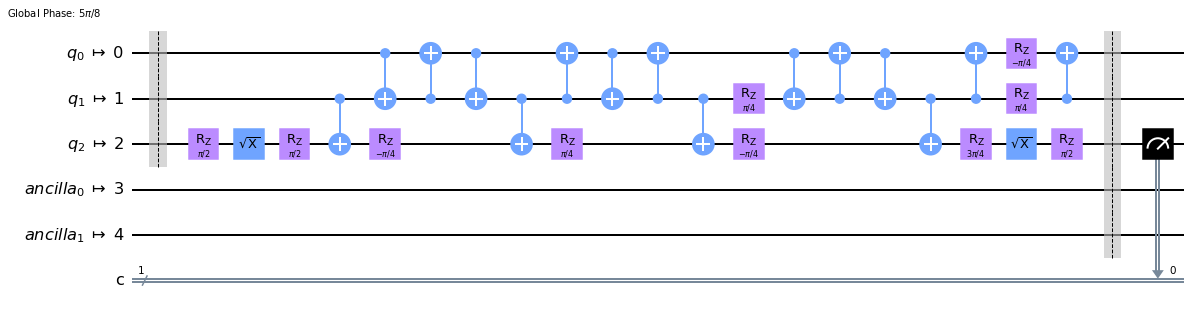

In [30]:
print('Transpiled AND gate circuit for ibmq_lima with input 0 0')
print('\nThe circuit depth : {}'.format (qc_trans2_all[0].depth()))
print('# of nonlocal gates : {}'.format (qc_trans2_all[0].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob2_all[0]) )
qc_trans2_all[0].draw(output = 'mpl')

Transpiled AND gate circuit for ibmq_lima with input 0 1

The circuit depth : 22
# of nonlocal gates : 15
Probability of correct answer : 0.93


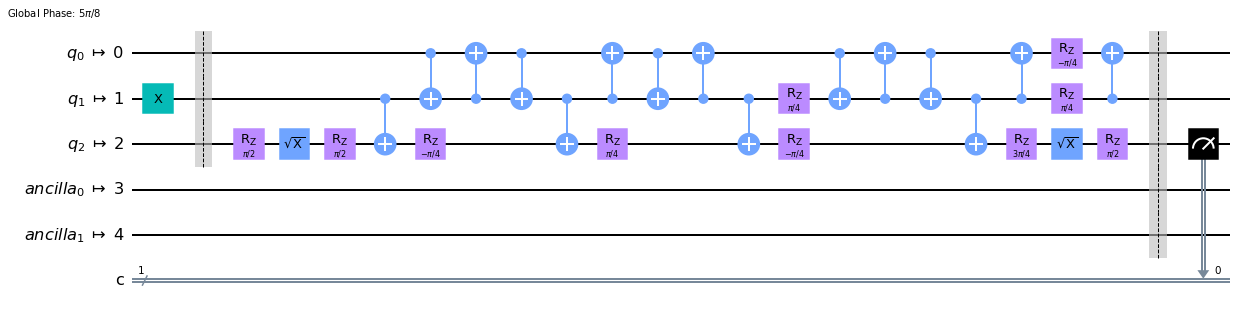

In [31]:
print('Transpiled AND gate circuit for ibmq_lima with input 0 1')
print('\nThe circuit depth : {}'.format (qc_trans2_all[1].depth()))
print('# of nonlocal gates : {}'.format (qc_trans2_all[1].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob2_all[1]) )
qc_trans2_all[1].draw(output = 'mpl')

Transpiled AND gate circuit for ibmq_lima with input 1 0

The circuit depth : 22
# of nonlocal gates : 15
Probability of correct answer : 0.94


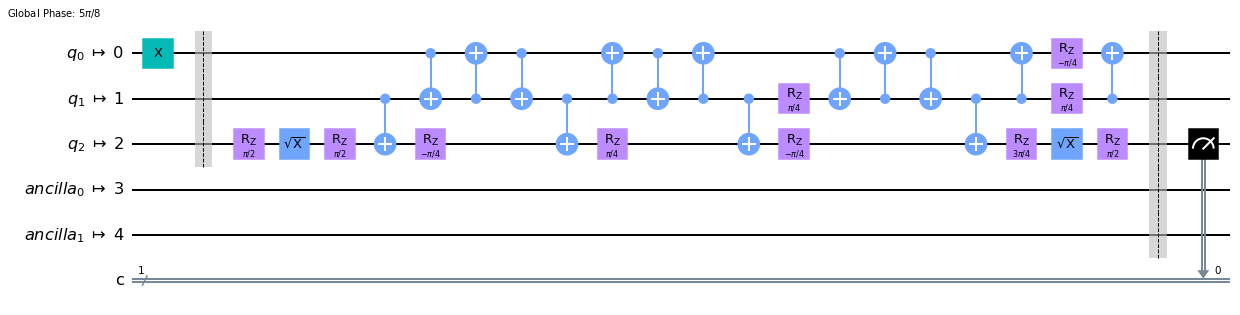

In [32]:
print('Transpiled AND gate circuit for ibmq_lima with input 1 0')
print('\nThe circuit depth : {}'.format (qc_trans2_all[2].depth()))
print('# of nonlocal gates : {}'.format (qc_trans2_all[2].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob2_all[2]) )
qc_trans2_all[2].draw(output = 'mpl')

Transpiled AND gate circuit for ibmq_lima with input 1 1

The circuit depth : 22
# of nonlocal gates : 15
Probability of correct answer : 0.85


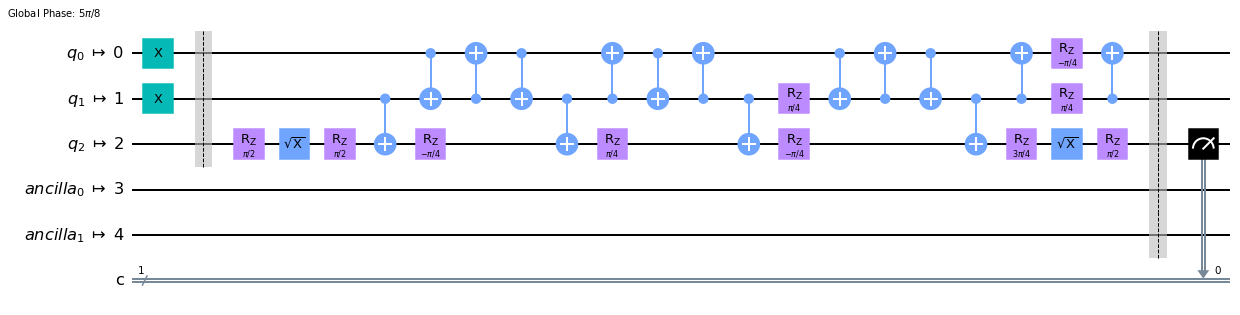

In [33]:
print('Transpiled AND gate circuit for ibmq_lima with input 1 1')
print('\nThe circuit depth : {}'.format (qc_trans2_all[3].depth()))
print('# of nonlocal gates : {}'.format (qc_trans2_all[3].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob2_all[3]) )
qc_trans2_all[3].draw(output = 'mpl')

Transpiled AND gate circuit for ibm_bogota with input 0 0

The circuit depth : 24
# of nonlocal gates : 21
Probability of correct answer : 0.71


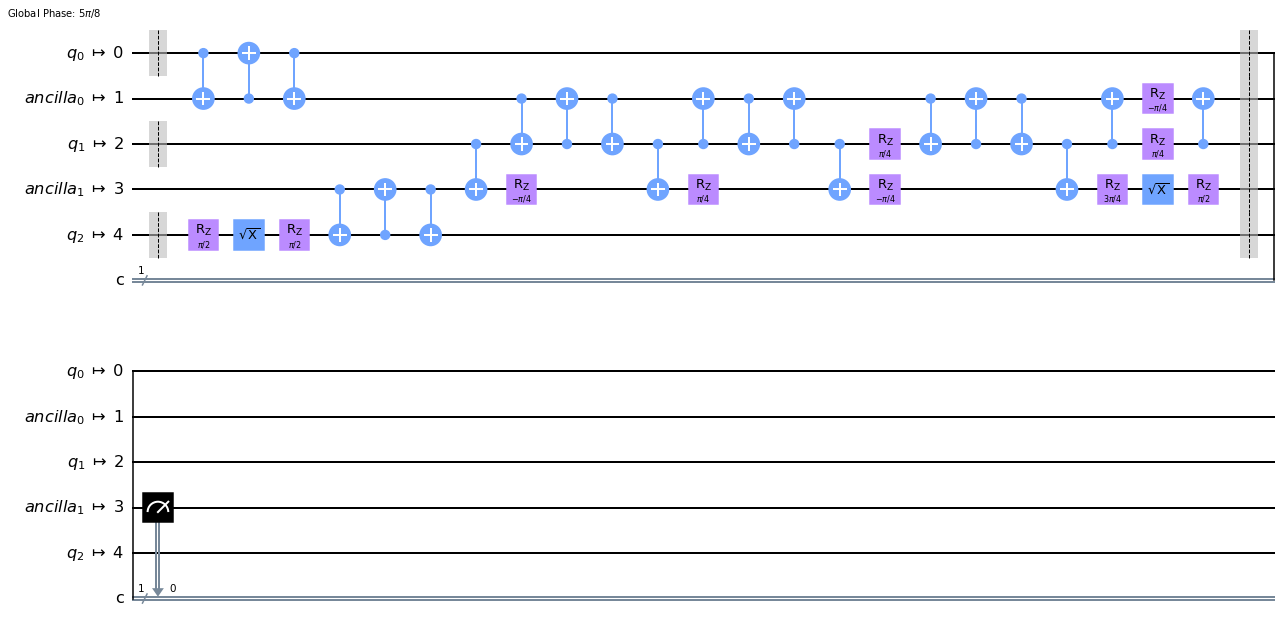

In [34]:
print('Transpiled AND gate circuit for ibm_bogota with input 0 0')
print('\nThe circuit depth : {}'.format (qc_trans1_all[0].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[0].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob1_all[0]) )
qc_trans1_all[0].draw(output = 'mpl')

Transpiled AND gate circuit for ibmq_lima with input 0 1

The circuit depth : 25
# of nonlocal gates : 21
Probability of correct answer : 0.88


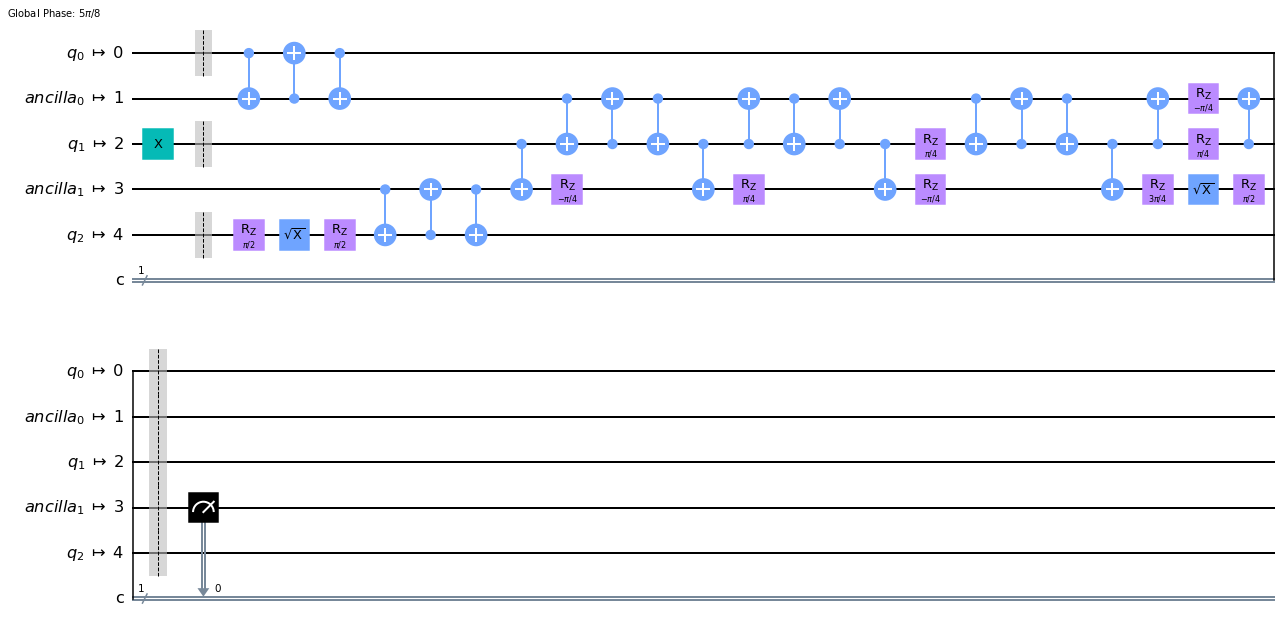

In [35]:
print('Transpiled AND gate circuit for ibmq_lima with input 0 1')
print('\nThe circuit depth : {}'.format (qc_trans1_all[1].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[1].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob1_all[1]) )
qc_trans1_all[1].draw(output = 'mpl')

Transpiled AND gate circuit for ibmq_lima with input 1 0

The circuit depth : 25
# of nonlocal gates : 21
Probability of correct answer : 0.89


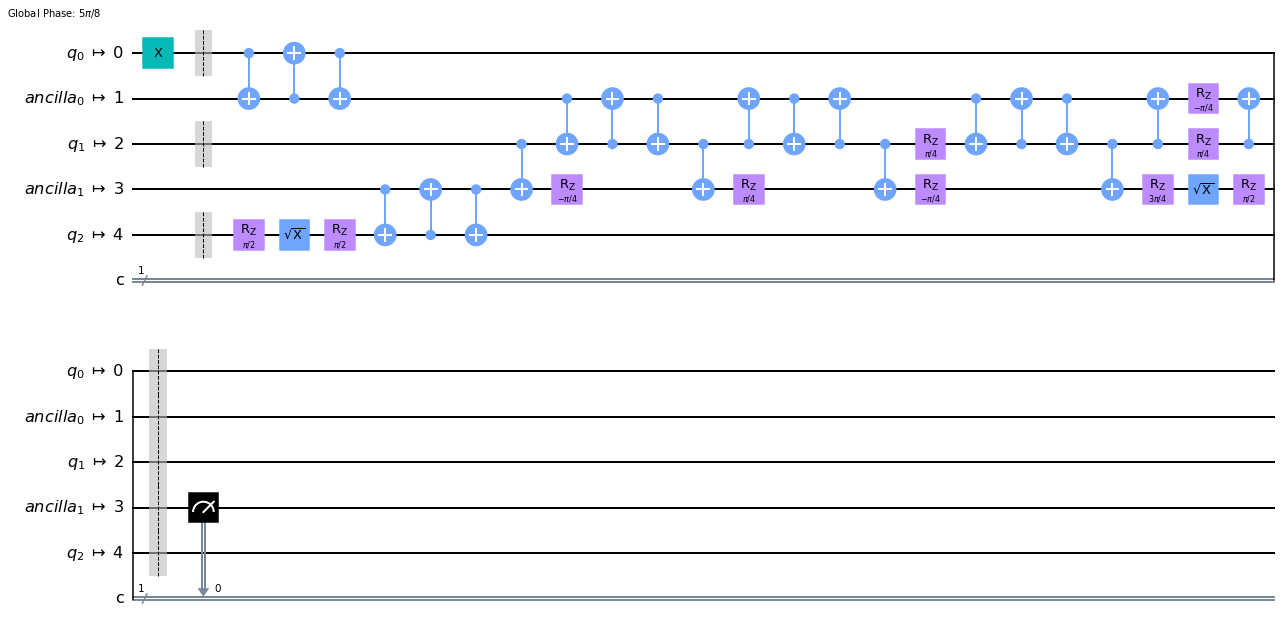

In [36]:
print('Transpiled AND gate circuit for ibmq_lima with input 1 0')
print('\nThe circuit depth : {}'.format (qc_trans1_all[2].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[2].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob1_all[2]) )
qc_trans1_all[2].draw(output = 'mpl')

Transpiled AND gate circuit for ibmq_lima with input 1 1

The circuit depth : 25
# of nonlocal gates : 21
Probability of correct answer : 0.81


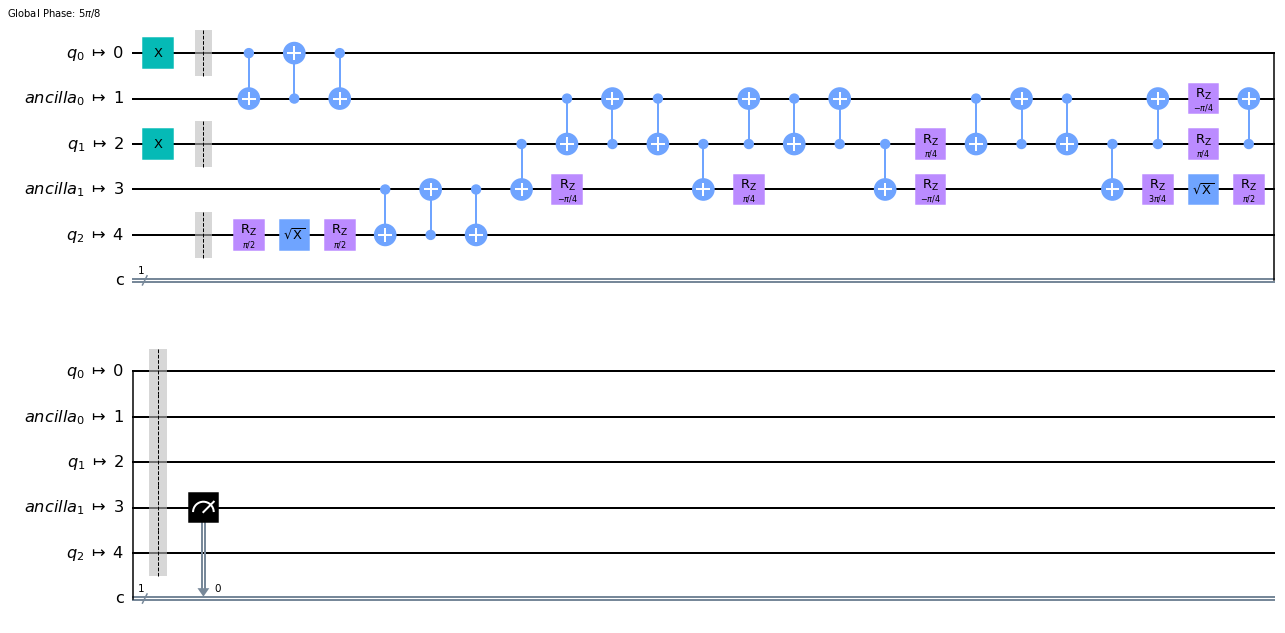

In [38]:
print('Transpiled AND gate circuit for ibmq_lima with input 1 1')
print('\nThe circuit depth : {}'.format (qc_trans1_all[3].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[3].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob1_all[3]) )
qc_trans1_all[3].draw(output = 'mpl')